## Задание

Имеются наблюдения $\{y_i\}$ в $N$ различных точках $\{x_i\}$ ($i \in (0, 1, ..., N)$).

1. Построить интерполяционный многочлен  Лагранжа.
2. Построить  графики многочлена и его первой и второй производных.
3. Построить интерполяционный кубический сплайн дефекта 1 с двумя вариантами граничных условий:
    - В крайних точках первая производная равна нулю
    - В крайних точках вторая производная равна нулю
4. Построить графики сплайна и его первой производной.

## Подготовительные работы

Загрузим данные и необходимые библиотеки для работы, сделаем настройки отображения графиков.

In [1]:
%matplotlib inline

import seaborn
seaborn.mpl.rcParams['figure.figsize'] = (7.0, 4.0)
seaborn.mpl.rcParams['savefig.dpi'] = 100

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

df = pd.read_csv("data/bhw_data.csv", sep=";", index_col=[0]).transpose().reset_index().astype(float)
data_matrix = df.as_matrix()
X = data_matrix[0:, 0]
Y = data_matrix[0:, 1]

## Решение

### Построение интерполяционного многочлена Лагранжа

Интерополяционный многочлен Лагранжа является примером решения интерполяционной задачи, когда для роли интерполяционной функции производится поиск многочлена минимальной степени. Для N пар $(x_i, y_i)$ это будет многочлен степени N - 1, который представляет собой линейную комбинацию некоторых многочленов $\varphi_j(t)$:

$$P(t) = \sum_{j = 1}^{N} y_i * \varphi_j(t)$$

Многочлены $\varphi_j(t)$ должны обладать выжным свойством:

$$\varphi_j(t) = \begin{cases} 1, & t = j \\ 0, & t \ne j \end{cases}$$

Очевидно, что в этом случае функкция $P(t)$ будет интерполяционной функцией. Такие многочлены могут быть выражены следующим образом:

$$\varphi_j(t) = \prod_{k = 1; k \ne j}^{N} (\frac{t - t_k}{t_j - t_k})$$

Реализуем функцию, которая создает функцию расчета интерполяционного многочлена Лагранжа.

In [2]:
import numpy as np

def create_langrange(X, Y):
    def lagrange(x):
        value = 0
        for i, (xi, yi) in enumerate(zip(X, Y)):
            prod = 1
            for j, (xj, yj) in enumerate(zip(X, Y)):
                if i != j:
                    prod *= (x - xj) / (xi - xj)
            value += prod * yi
        return value
    return np.vectorize(lagrange)

### Построение графика интерполяционного многочлена, а также его первой и второй производных

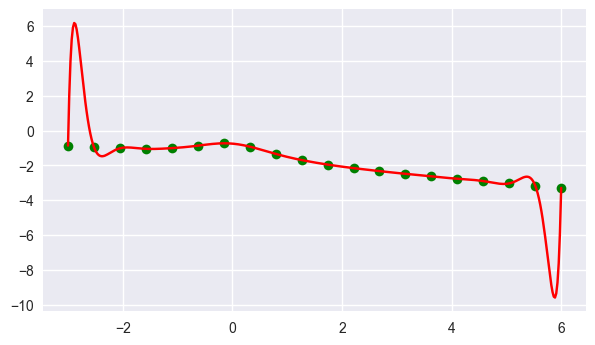

In [3]:
P = create_langrange(X, Y)

t = np.linspace(np.min(X), np.max(X), 400)
L = P(t)

pY = plt.plot(X, Y, 'og')
pL = plt.plot(t, L, '-r')

Выведем формулу первой производной базисной функции:

$$ \varphi_j^{'}(t) = \left( \prod_{j = 1; j \ne k}^{N} (\frac{t - t_j}{t_k - t_j}) \right)^{'} = \\
\frac{1}{\prod_{j = 1; j \ne k}^{N}(t_k - t_j)} * \left( \sum_{j = 1}^{N} \prod_{i = 1; i \ne j}^{N} (t - t_i) \right)$$

Продиференцировав еще раз, получаем формулу для второй производной базисной функции:

$$ \varphi_j^{''}(t) = (\varphi_j^{'}(t))^{'} = \frac{1}{\prod_{j = 1; j \ne k}^{N}(t_k - t_j)} * \left( \sum_{j = 1}^{N} \prod_{i = 1; i \ne j}^{N} (t - t_i) \right)^{'} = \\
 \frac{1}{\prod_{j = 1; j \ne k}^{N}(t_k - t_j)} * \left( \sum_{j = 1}^{N} \sum_{p = 1}^{N} \prod_{i = 1; i \ne j; i \ne p}^{N} (t - t_i) \right) $$

Реализуем функцию, которая создает функцию расчета первой производной интерполяционного многочлена Лагранжа.

$$P^{(k)}(t) = \sum_{i = 1}^{N} \varphi_i^{(k)}(t)$$

In [4]:
def create_langrange_fd(X, Y):
    def fd(x):
        value = 0
        for k, (xk, yk) in enumerate(zip(X, Y)):
            prod_del = 1
            summ = 1
            for j, xj in enumerate(X):
                prod = 1
                for i, xi in enumerate(X):
                    if i != j:
                        prod *= (x - xi)
                summ += prod   
                if j != k:
                    prod_del *= (xk - xj)
            value += yk * (summ / prod_del)
        return value
    return np.vectorize(fd) 

Реализуем функцию, которая создает функцию расчета второй производной интерполяционного многочлена Лагранжа.

In [5]:
def create_langrange_sd(X, Y):
    def sd(x):
        value = 0
        for k, (xk, yk) in enumerate(zip(X, Y)):
            prod_del = 1
            summ = 1
            for j, xj in enumerate(X):
                for p, xp in enumerate(X):
                    prod = 1
                    for i, xi in enumerate(X):
                        if i != j and i != p:
                            prod *= (x - xi)
                    summ += prod   
                if j != k:
                    prod_del *= (xk - xj)
            value += yk * (summ / prod_del)
        return value
    return np.vectorize(sd) 

#### Нарисуем график первой производной интерполяционного многочлена Лагранжа

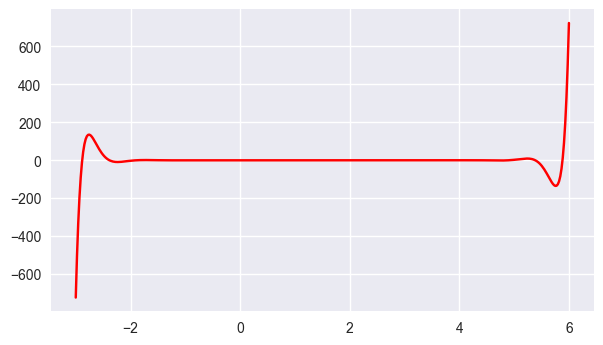

In [6]:
lfd = create_langrange_fd(X, Y)
fdv = lfd(t)

pL = plt.plot(t, fdv, '-r')

#### Нарисуем график второй производной интерполяционного многочлена Лагранжа

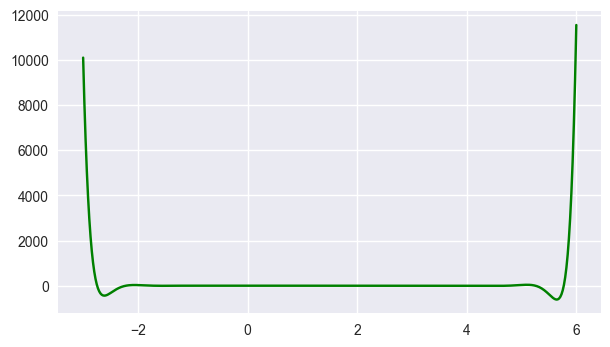

In [7]:
lsd = create_langrange_sd(X, Y)
sdv = lsd(t)

pL = plt.plot(t, sdv, '-g')

### Построение интерполяционного кубического сплайна дефекта 1.

#### Краткая теория.

Для построения интерполяционного кубического сплайна дефекта 1 необходимо решить следующую линейную систему относительно значений производных в узлах интерполяции $\{ m_0, ..., m_N \}$, состоящую из (N - 1) уравнения при (N + 1) неизвестных:

$$\lambda_{j} m_{j-1} + 2 m_{j} + \mu_{1} m_{2} = c_{j}$$

где

$$\lambda_{j} = \frac{h_{j+1}}{h_{j+1} + h_{j}}$$
$$\mu_{j} = 1 - \lambda_{j} = \frac{h_{j}}{h_{j+1} + h_{j}}$$
$$c_{j} = 3  \frac{\mu_{j} y_{j+2} - y_{j+1}}{h_{j+1}} + 3 \frac{y_{j+1} - \lambda_{j} y_{j}}{h_{j}}$$

для $1 < j < N$

Дополнить систему можно дополнить условиями на равенство либо первых либо вторых производных в крайних точках.

Расчет значения сплайна в заданной точке $x$ из интервала $[x_1, x_2]$ с заданными значениями функции $(y_1, y_2)$ и первых производных $(P^{'}(x_1), P^{'}(x_2))$ находится по следующей формуле:

$$ P(x) = P^{'}(x_1) * \frac{(x - x_1) * (x - x_2)^2}{h^2} + y_1 * \left[ \frac{2 * (x - x_1) * (x - x_2)^2}{h^3} + \frac{(x - x_2)^2}{h^2} \right] + \\
P^{'}(x_2) * \frac{(x - x_2) * (x - x_1)^2}{h^2} + y_2 * \left[ \frac{2 * (x_2 - x) * (x - x_1)^2}{h^3} + \frac{(x - x_1)^2}{h^2} \right] $$

Реализуем функцию для рассчета сплайна. На входе значения производных в заданных точках, а также значения самих точек, на выходе соответствующая функция для рассчета.

In [8]:
from numpy import ones, zeros
from scipy.linalg import solve_banded

def create_spline(X, Y, fd=True):
    N = X.shape[0]

    hs = X[1:N] - X[0:N-1]
    lambdas = hs[1:N-1] / (hs[1:N-1] + hs[0:N-2])
    mus = 1 - lambdas

    cs = np.zeros(N)
    cs[1:N-1] = 3 * (mus[0:N-2] * Y[2:N] - Y[1:N-1]) / hs[1:N-1] + \
                3 * (Y[1:N-1] - lambdas[0:N-2] * Y[0:N-2]) / hs[0:N-2]
    
    A=np.zeros((N,N))
    A[1:-1,1:-1] = np.diag(np.ones((N-2))*2)
    for i in range(1, N - 1):
        A[i,i-1] = lambdas[i-1]
        A[i,i+1] = mus[i-1]
        
    if fd == True: 
        # случай равенства первой производной на краях нулю
        A[0,0] = 1
        A[-1,-1] = 1
    else:
        # случай равенства второй производной на краях нулю
        A[0,0] = 2 * hs[0]
        A[0,1] = hs[0]
        A[-1,-1] = 2 * hs[N-2]
        A[-1,-2] = hs[N-2]
        cs[0] = 3 * Y[1] - 3 * Y[0]
        cs[N-1] = 3 * Y[N - 1] - 3 * Y[N - 2]
        
    # верхняя диагональ
    ud = np.insert(np.diag(A,1), 0, 0) 
    # главная диагональ
    d = np.diag(A)
    # нижняя диагональ
    ld = np.insert(np.diag(A,-1), len(d) - 1, 0)

    # упрощенная матрица, содержит только диагонали
    A = np.matrix([
        ud,
        d,
        ld,
    ])

    # оптимизированный метод решения для диагональных линейных систем
    # решаем и получаем значения производных в точках
    return solve_banded((1, 1), A, cs)

def create_spline_calculator(ms, X, Y):
    N = X.shape[0]
    hs = X[1:N] - X[0:N-1]
    def _spline(x):
        i = None
        # производим поиск интервала в котором лежит заданная точка
        for interval in range(0, X.shape[0] - 1):
            if X[interval] <= x and x <= X[interval+1]:
                i = interval
                break
        # рассчитываем и возвращаем значение сплайна в заданной точке
        return ((ms[i]*(x-X[i])*(x-X[i+1])**2)/(hs[i])**2)+ \
                      Y[i]*(((2*(x-X[i])*(x-X[i+1])**2)/(hs[i])**3)+((x-X[i+1])**2)/(hs[i])**2)+ \
                      ((ms[i+1]*(x-X[i+1])*(x-X[i])**2)/(hs[i])**2)+ \
                      Y[i+1]*(((2*(X[i+1]-x)*(x-X[i])**2)/(hs[i])**3)+((x-X[i])**2)/(hs[i])**2)
    return np.vectorize(_spline)


### Рассчитаем сплайн при условии равенства первой производной нулю на концах. Построим графики полученного сплайна и его производной

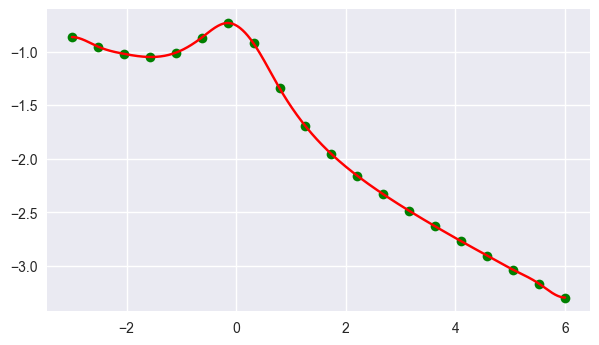

In [9]:
t = np.linspace(np.min(X), np.max(X), 1000)

ms = create_spline(X, Y, fd=True)
S = create_spline_calculator(ms, X, Y)(t)

pY = plt.plot(X, Y, 'og')
pL = plt.plot(t, S, '-r')

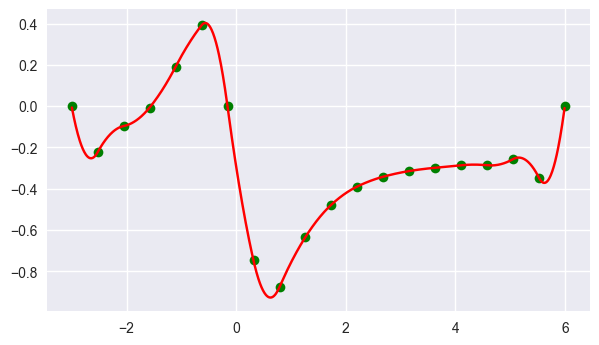

In [10]:
pY = plt.plot(X, ms, 'og')
pL = plt.plot(t[0:-1], (S[1:] - S[0:-1]) / (t[1:] - t[0:-1]), '-r')

### Рассчитаем сплайн при условии равенства второй производной нулю на концах. Построим графики полученного сплайна и его производной

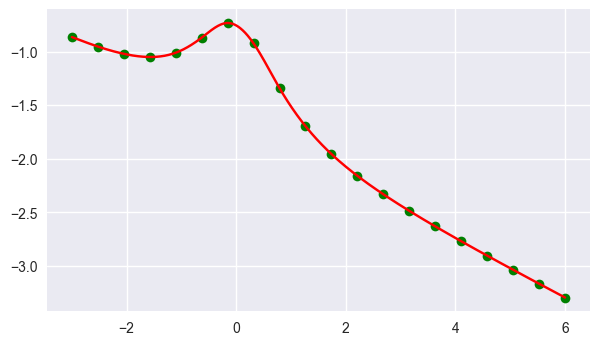

In [11]:
ms = create_spline(X, Y, fd=False)
S = create_spline_calculator(ms, X, Y)(t)

pY = plt.plot(X, Y, 'og')
pL = plt.plot(t, S, '-r')

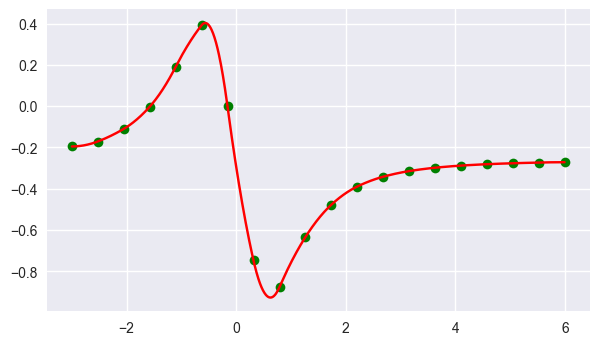

In [12]:
pY = plt.plot(X, ms, 'og')
pL = plt.plot(t[0:-1], (S[1:] - S[0:-1]) / (t[1:] - t[0:-1]), '-r')